# BCI-IL - Introduction to EEG Analysis Exercises 

Download the following files from the course page and place it in the same folder as this script:

 - The python file `bci_minitoolbox.py` containing some small utility functions.
 - The EEG dataset `eyes_closed_VPal.npz` which was recorded from a participant while relaxing with their eyes closed.

In [1]:
% matplotlib inline

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

In [2]:
fname= 'eyes_closed_VPal.npz'
X, fs, clab, mnt = bci.load_data(fname)

The EEG signals are in the matrix `X` with channels in the first and time in the second dimension.

In [3]:
np.shape(X)

(118, 5958)

In [4]:
fs

array(100, dtype=uint8)

The labels of the corresponding channels are in the list `clab`. Indices of a specified channel can be obtained by the `index` function. The indices of several channels can be obtained simultaneously by employing an iterator.

In [5]:
ci = clab.index('Cz')
print(ci)

print('The first samples of channel %s are:' % clab[ci])
print(X[ci][:10])

selected_channels = ['Fpz', 'Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
idx = [clab.index(x) for x in selected_channels]
print('\nThe indices of the selected channels are:')
print(idx)

53
The first samples of channel Cz are:
[ -6.3  -0.6 -13.1  -7.6  -3.7  -4.7 -15.4 -13.5 -17.7 -11.4]

The indices of the selected channels are:
[2, 17, 35, 53, 71, 90, 105, 112]


The sampling rate of the signals is given in variable `fs`.

Sampling rate fs= 100


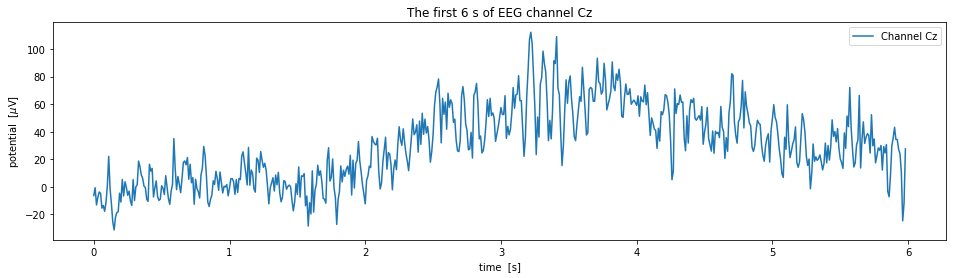

In [6]:
print('Sampling rate fs= %d' % fs)

# define time axis for plotting
timeaxis = np.arange(0, np.shape(X)[1]/fs, 1/fs)

nSec= 6
plt.figure(figsize=(16,4))
timeidx= np.arange(0, nSec*fs-1)
plt.plot(timeaxis[timeidx], X[ci, timeidx], label='Channel {}'.format(clab[ci]))
plt.xlabel('time  [s]')
plt.ylabel('potential  [$\mu$V]')
plt.legend()
plt.title('The first %d s of EEG channel %s' % (nSec,clab[ci]))

## Exercises

Plot the signals of Channels C4 and C3 into one plot for the time interval 10 to 15 s.

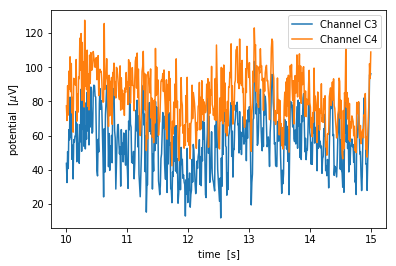

In [7]:
nSec = 5
ival = [10, 15]
selected_channels = ['C3', 'C4']

cidx = [clab.index(x) for x in selected_channels]
tidx= np.arange(ival[0]*fs, ival[1]*fs)

X34 = X[cidx,:][:,tidx]
plt.plot(timeaxis[tidx], X34.T)
plt.xlabel('time  [s]')
plt.ylabel('potential  [$\mu$V]')
plt.legend(['Channel {}'.format(selected_channels[ci]) for ci in range(0, 2)])

Plot the same signals as before, but each shifted along the y-axis in the following way: Calculate the average (over time) of each signal during the first second of the displayed interval and subtract that value from the whole signal. 

(2, 500)


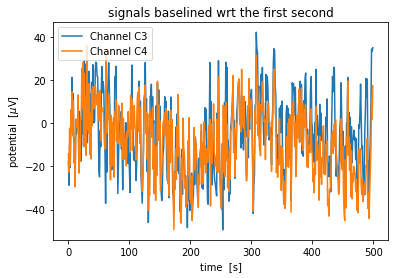

In [8]:
ref_ival = [0, 1]  # relative time interval within X34

ref_tidx = np.arange(ref_ival[0]*fs, ref_ival[1]*fs)
X34_base = X34 - np.mean(X34[:, ref_tidx], axis=1, keepdims=True)
print(X34_base.shape)

#plt.plot(timeaxis[tidx], X34_base.T)
plt.plot(X34_base.T)
plt.xlabel('time  [s]')
plt.ylabel('potential  [$\mu$V]')
plt.legend(['Channel {}'.format(selected_channels[ci]) for ci in range(0, 2)])
plt.title('signals baselined wrt the first second')

Look into the code of the functions in the bci_minitoolbox. Visualize the brain activity at time t = 5 s as scalp topography.

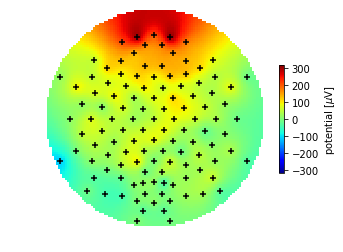

In [9]:
time = 5

ti = time*fs;
scalp_potential = X[:,ti]
bci.scalpmap(mnt, scalp_potential, clim='sym', cb_label='potential [$\mu$V]')

Plot a sequence of scalp topographies for the time points 5.0, 5.1, 5.2, ..., 6.0 s. Use a common scaling for all colorbars.

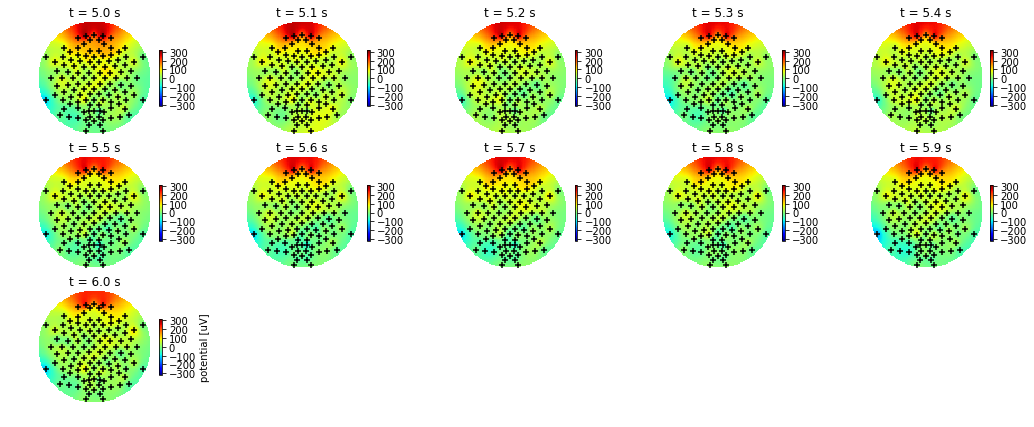

In [10]:
time = [5, 6]
time_step = 0.1

time_vec = np.arange(time[0], time[1]+time_step, time_step)

# determine max abs amplitude for common scaling
maxamp = abs(X[:, (time_vec*fs).astype(int)]).max()

# subplot layout (max 5 columns)
plt.figure(figsize=(18, 7))
n_plots = len(time_vec)
nx = min(5, n_plots)
ny = np.ceil(n_plots / nx)

for idx, tp in enumerate(time_vec, start=1):
    plt.subplot(ny, nx, idx)
    scalp_potential = X[:, np.int(tp*fs)]
    if idx == n_plots:
        bci.scalpmap(mnt, scalp_potential, clim=(-maxamp,maxamp), cb_label='potential [uV]')
    else:
        bci.scalpmap(mnt, scalp_potential, clim=(-maxamp,maxamp))
    plt.title('t = {:.1f} s'.format(tp))